### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read data in to DataFrame
data = pd.read_csv(r"C:\Users\Hrishikesh\OneDrive\Documents\Hrishikesh Imarticus\SGC\Day 1\Group 2 - Sleep Disorder Analysis\Sleep_disorder_data.csv",index_col=0,header=0)
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
data.shape

(374, 12)

In [4]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [5]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [6]:
data['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [7]:
Y = data.drop(data.iloc[:,:-1],axis=1)
Y

,Sleep Disorder
Person ID,
1,NaN
2,NaN
3,NaN
4,Sleep Apnea
5,Sleep Apnea
...,...
370,Sleep Apnea
371,Sleep Apnea
372,Sleep Apnea


In [8]:
Y.reset_index(drop=True,inplace=True)

In [9]:
Y

,Sleep Disorder
0,NaN
1,NaN
2,NaN
3,Sleep Apnea
4,Sleep Apnea
...,...
369,Sleep Apnea
370,Sleep Apnea
371,Sleep Apnea
372,Sleep Apnea


In [10]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


#### Data Audit - Basic understanding of the data

In [11]:
data.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [12]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [13]:
data['Sleep Disorder'] = data['Sleep Disorder'].replace({'None':'No Disorder'})
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [14]:
data.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [16]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [17]:
data.describe(include='all')

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155
unique,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2
top,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78
mean,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


### Data Cleaning:

In [19]:
data['Sleep Disorder'].fillna('No Disorder',inplace=True)
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [20]:
data.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [21]:
data.duplicated().sum()

242

## Univariate Analysis

##### Countplot - Frequency Distribution of a Single Categorical or Discrete Variable
##### Histogram - Frequency Distribution of a Single Continuous Numeric Variable
##### Boxplot - Frequency Distribution of a Single Continuous numeric variable along with additional info about central tendency and outliers

#### Q) What is the distribution of Males and Females in the Data?

In [22]:
data['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

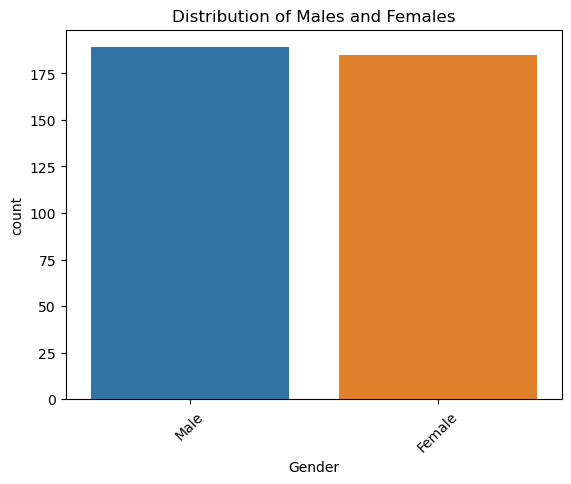

In [23]:
sns.countplot(data=data, x= 'Gender',hue = 'Gender')
plt.title('Distribution of Males and Females')
plt.xticks(rotation=45);

We can see that, the number of males and females are approx. the same.

#### Q) Understanding the Distribution of the sleep disorders

In [24]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

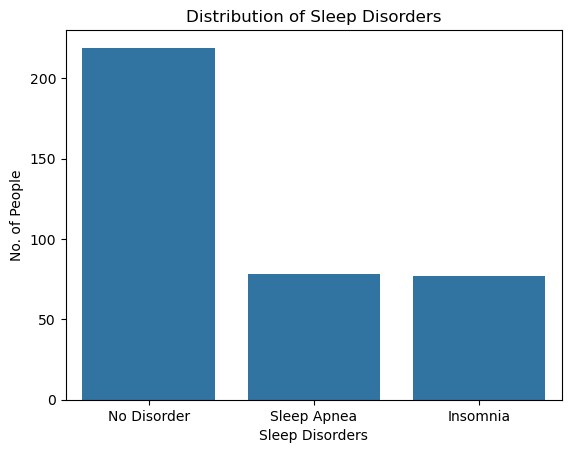

In [25]:
sns.countplot(data = data, x = 'Sleep Disorder')
plt.title('Distribution of Sleep Disorders')
plt.ylabel('No. of People')
plt.xlabel('Sleep Disorders');

We can see that our data consists of more number of people without sleeping disorders.

#### Q) Which Age groups do we have?

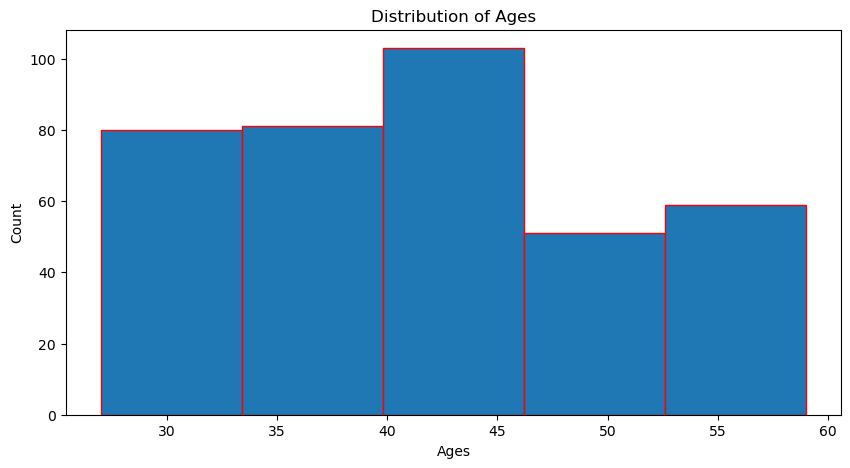

In [26]:
plt.figure(figsize=(10,5))
plt.hist(data['Age'],bins=5,edgecolor='red')
plt.title('Distribution of Ages')
plt.xlabel('Ages')
plt.ylabel('Count');

We can see that there are a lot of people(around 100) are between the ages of 40-46~

#### Q) Understanding the percentage Distribution of the sleep disorders


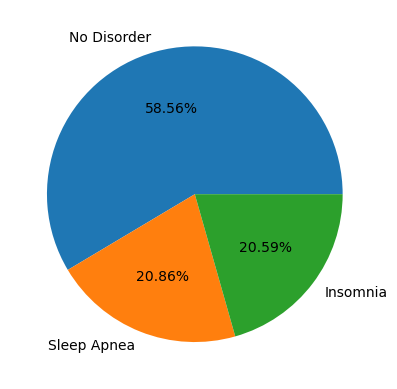

In [27]:
data['Sleep Disorder'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.ylabel('');

We can see that around 59% of people in our dataset have no disorders, and Sleep apnea and Insomnia amount to 21% of the data, each.

In [28]:
data['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

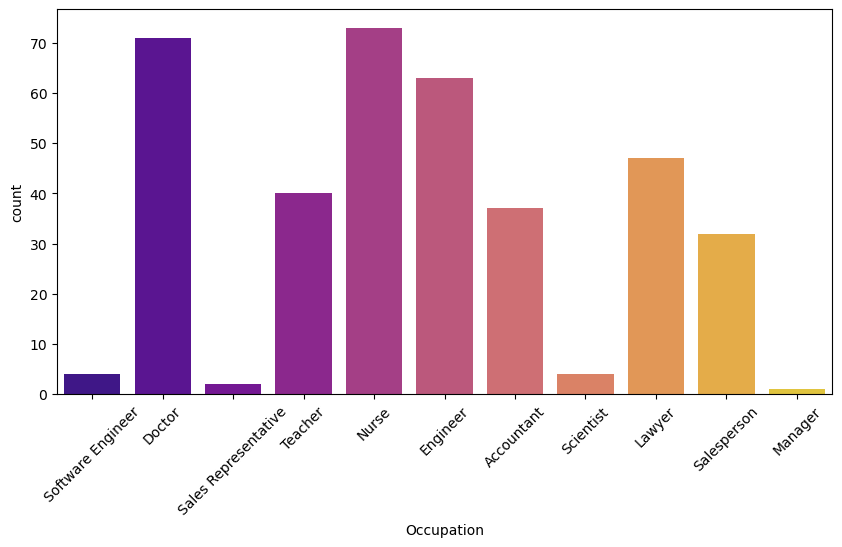

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data = data, x = 'Occupation', palette= 'plasma')
plt.xticks(rotation=45);

We can see that doctors, nurses and engineers amount up to more than 50% of the population in our dataset.

In [30]:
data['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

<Axes: xlabel='BMI Category', ylabel='count'>

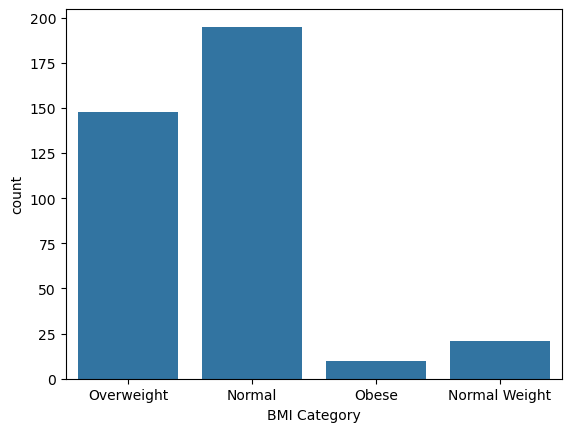

In [31]:
sns.countplot(data = data, x='BMI Category')

In [32]:
data['BMI Category'].replace({'Normal Weight':'Normal'},inplace=True)

In [33]:
data['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

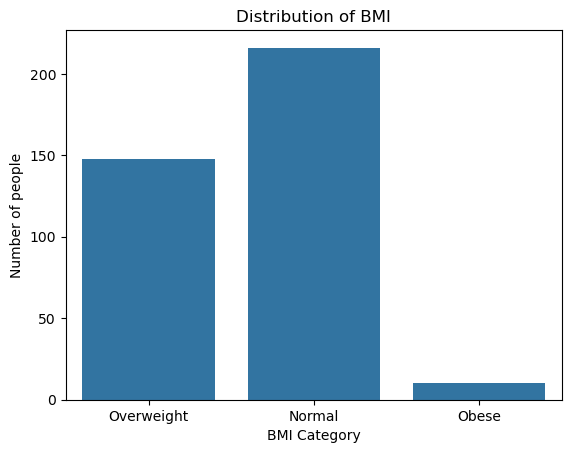

In [35]:
sns.countplot(data=data, x= 'BMI Category')
plt.title('Distribution of BMI')
plt.ylabel('Number of people');

**Analysis**: We can see that there are more number of Healthy people as far as BMI is concerned, followed by overweight individuals.

#### Let's try to check for outliers and plot a boxplot.

In [36]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [37]:
data[data['Heart Rate']>75]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
17,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Sleep Apnea
19,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Insomnia
31,Female,30,Nurse,6.4,5,35,7,Normal,130/86,78,4100,Sleep Apnea
32,Female,30,Nurse,6.4,5,35,7,Normal,130/86,78,4100,Insomnia


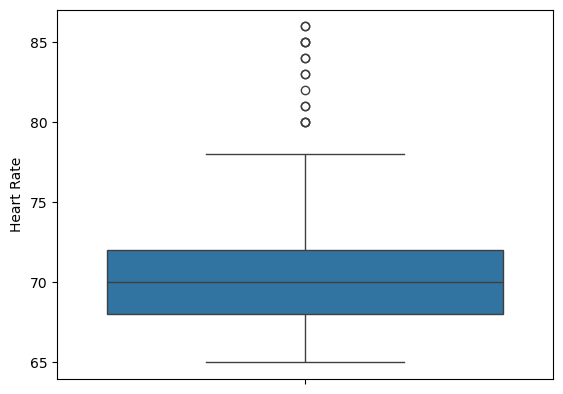

In [139]:
sns.boxplot(data['Heart Rate']);

The heart rate of all the individuals seems to be normal.

In [39]:
df=data[data['Heart Rate']<75]
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder
10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder
11,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,No Disorder
12,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


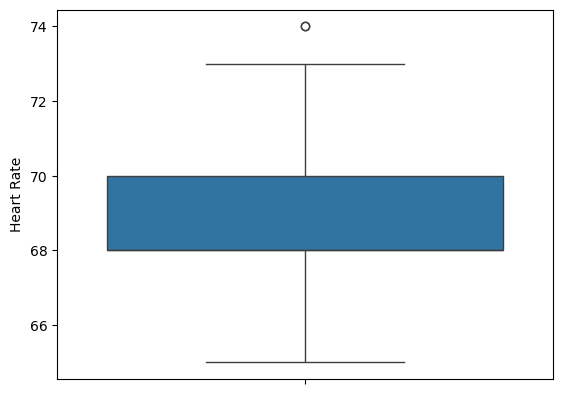

In [42]:
sns.boxplot(df['Heart Rate']);

In [43]:
df['Heart Rate'].median()

68.0

Here, we can see that a few individuals have slightly higher heart rate than the majority. Hence shown as outliers by the boxplot.

## Bivariate Analysis

#### Q) How are the Genders affected by the sleep disorders?

##### Barplot - To understand relation between 1 Categorical and 1 Numerical Feature
##### Scatterplot - 2 Continuous Numeric Features
##### Boxplot - To understand relation between 1 Continuous and 1 Categorical Feature

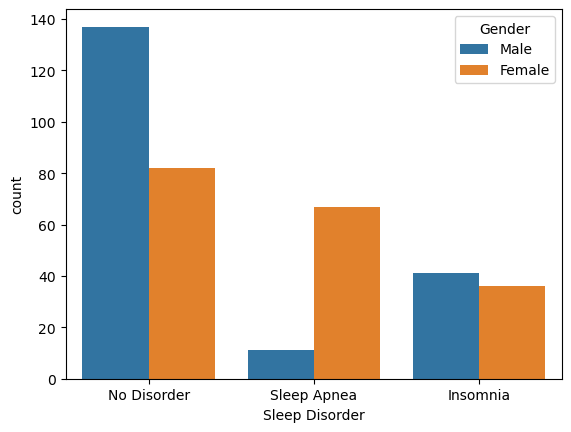

In [78]:
sns.countplot(data = data, x = 'Sleep Disorder', hue = 'Gender');               #Without Bar Labels

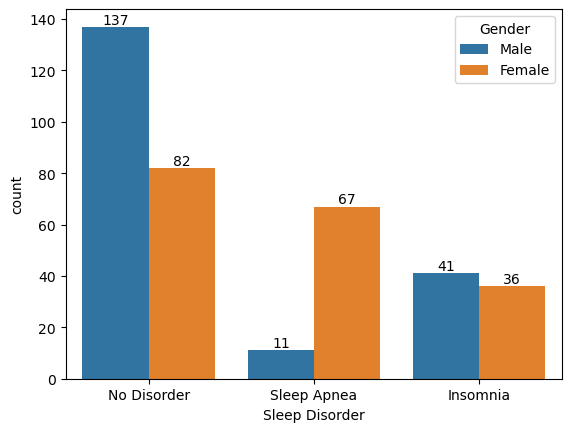

In [79]:
ax = sns.countplot(data = data, x = 'Sleep Disorder', hue = 'Gender')      #With Bar Labels

for bars in ax.containers:
    ax.bar_label(bars)

Inference 1: We have more males with No Sleeping disorder than females.  
Inference 2: Females are almost 6 times more prone to Sleep Apnea than Men.  
Inference 3: Similar number of Men and women suffer from insomnia.  

#### Q) How does BMI category influence Sleep Duration?

In [80]:
no_sleep_disorder = data[data["Sleep Disorder"]=="No Disorder"]
no_sleep_disorder

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder
...,...,...,...,...,...,...,...,...,...,...,...,...
342,Female,56,Doctor,8.2,9,90,3,Normal,118/75,65,10000,No Disorder
343,Female,56,Doctor,8.2,9,90,3,Normal,118/75,65,10000,No Disorder
344,Female,57,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,No Disorder


In [81]:
data["Sleep Disorder"].value_counts()

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [82]:
data.shape

(374, 12)

In [83]:
sleep_disorder = data[(data["Sleep Disorder"] == "Sleep Apnea") | (data["Sleep Disorder"] == "Insomnia")]
sleep_disorder

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
17,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


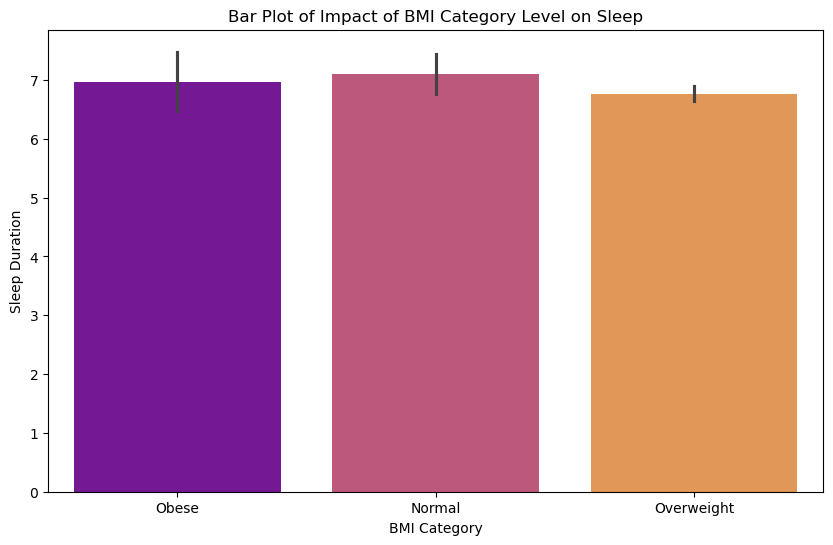

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(sleep_disorder, x='BMI Category', y='Sleep Duration', palette='plasma' )
plt.title('Bar Plot of Impact of BMI Category Level on Sleep')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration')
plt.show()

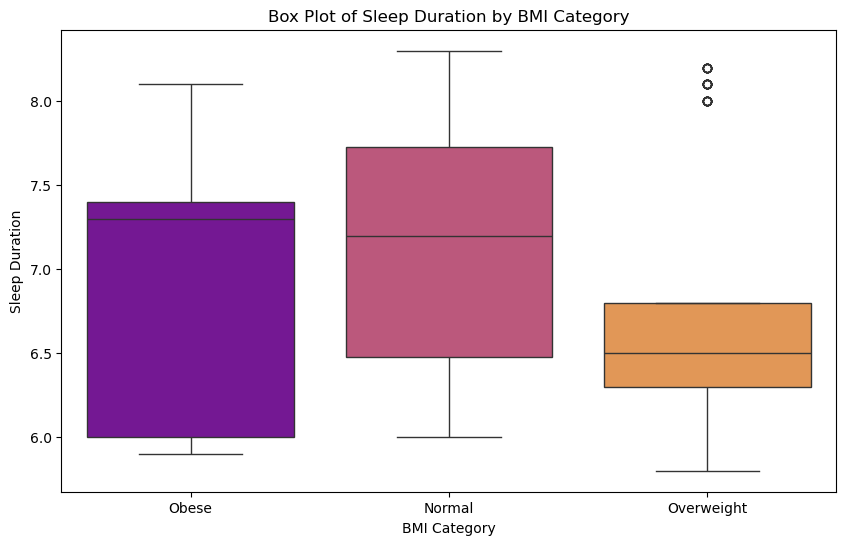

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=sleep_disorder, palette='plasma')
plt.title('Box Plot of Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration')
plt.show()

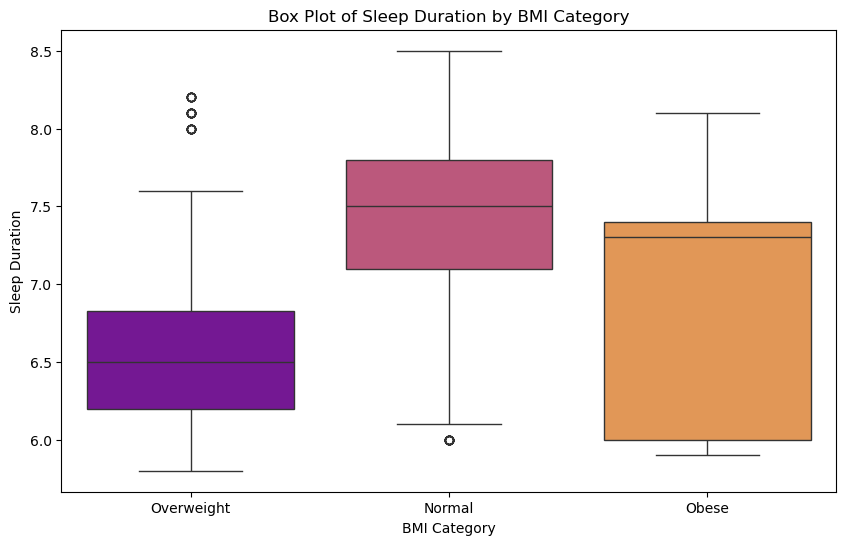

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=data, palette='plasma')
plt.title('Box Plot of Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration')
plt.show()

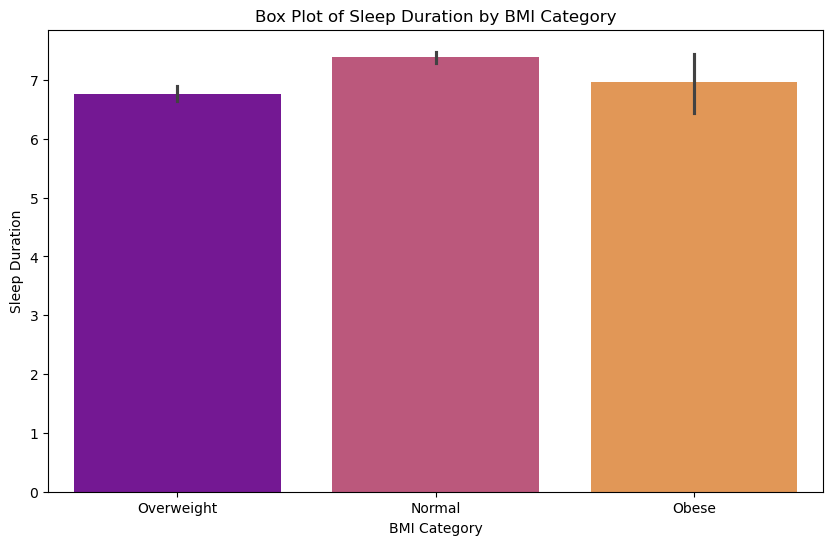

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI Category', y='Sleep Duration', data=data, palette='plasma')
plt.title('Box Plot of Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration')
plt.show()

Considering all three graphs above we can say that the normal bmi category individuals have a more consistent sleep duration on an average leading to a healthier lifestyle (Considering Sleep disorders)

In [33]:
data['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

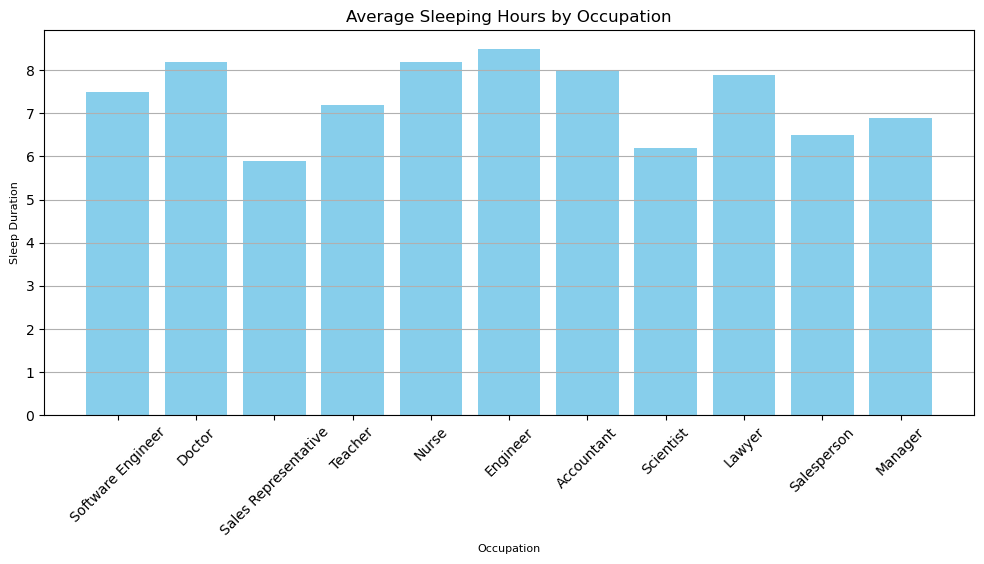

In [49]:
plt.figure(figsize=(12, 5))
plt.bar('Occupation','Sleep Duration',data=data, color='skyblue')

plt.title('Average Sleeping Hours by Occupation', fontsize=12)
plt.xlabel('Occupation', fontsize=8)
plt.ylabel('Sleep Duration', fontsize=8)
plt.xticks( rotation=45)
plt.grid(axis='y')
plt.show()

We can say that Engineers, Nurses and doctors on an average are sleeping more than 8hrs daily, followed by accountants and lawyers.  
Also, people in the sales domain seem to be sleeping less than the other occupations overall.

### Multivariate Analysis

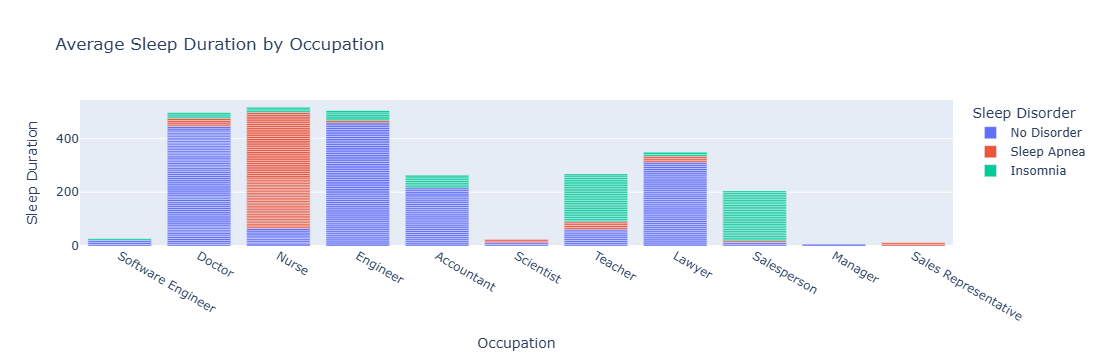

In [51]:
fig = px.bar(data, x='Occupation', y='Sleep Duration', color='Sleep Disorder', title="Average Sleep Duration by Occupation")
fig.show()

We can see that Nurses are highly affected by sleep apnea, while salespersons and teachers are affected by insomnia. on the other hand, doctors and engineers have no sleeping disorders.

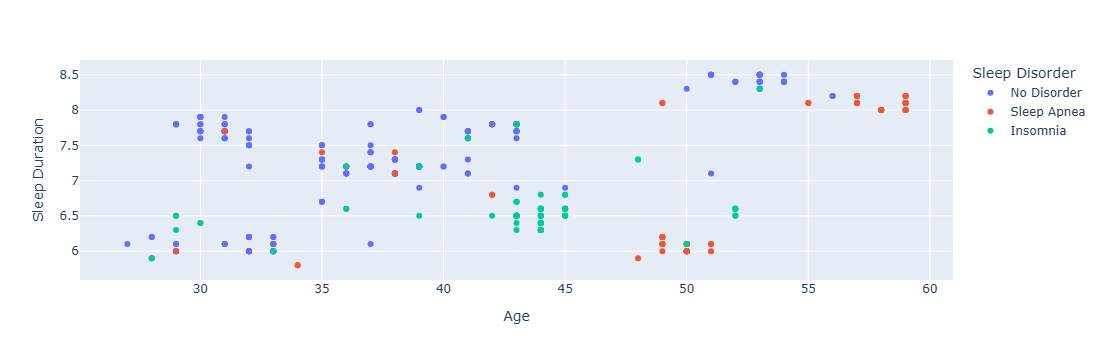

In [52]:
fig=px.scatter(data,x='Age',y='Sleep Duration',color='Sleep Disorder')
fig.show()

We can see that younger people are usually healthier when it comes to having sleeping disorders even if they get slightly less sleep daily on an average, whereas older people are more prone to sleeping disorders like sleep apnea.

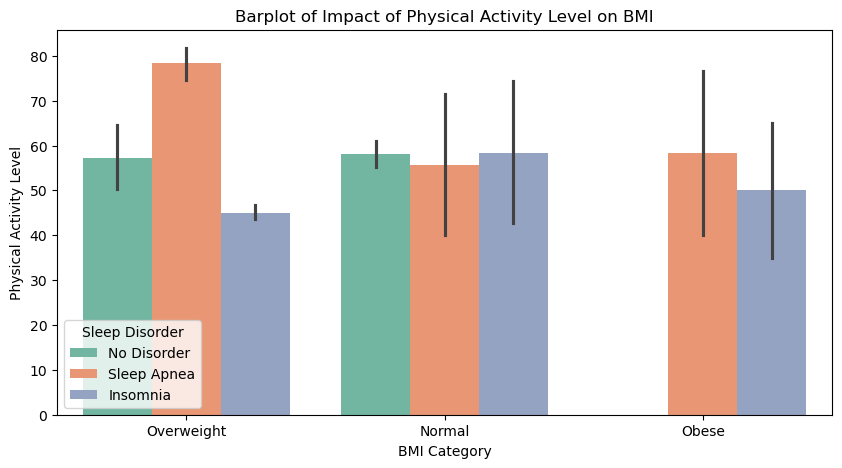

In [57]:
plt.figure(figsize=(10, 5))
sns.barplot(data, x='BMI Category', y='Physical Activity Level',hue='Sleep Disorder', palette='Set2')
plt.title('Barplot of Impact of Physical Activity Level on BMI')
plt.xlabel('BMI Category')
plt.ylabel('Physical Activity Level')
plt.show()


inference 1: 100% of obese people have some kind of a sleeping disorder regardless of the physical activity done by them.  
Inference 2: Overweight people are suffering more from sleep apnea than insomnia if they spend more time on physical activity.  
Inference 3: BMI category isn't really affecting individuals having normal BMI/healthy individuals (according to bmi).  

#### Heatmap ( Very Important!)

Some key points to remember about Heatmap:

**-0.4 to 0.4** - Low Correlation  
**-0.4 to -0.75** or **0.4 to 0.75** - Moderate Correlation  
**-0.75 and below** or **0.75 and above** - High Correlation  

In [60]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [61]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [62]:
data['Sleep Disorder'] = data['Sleep Disorder'].replace({'No Disorder': 0, 'Sleep Apnea': 1, 'Insomnia': 2})

In [63]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1


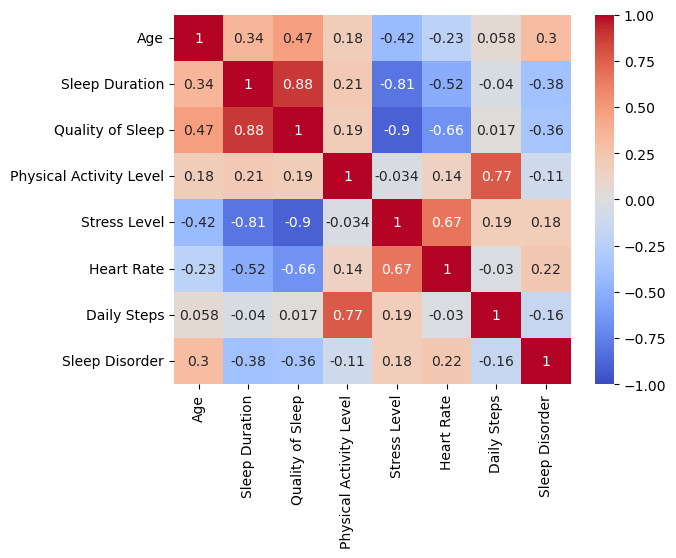

In [67]:
corr_df = data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps','Sleep Disorder']].corr()
sns.heatmap(corr_df, vmin=-1,annot=True, cmap='coolwarm');

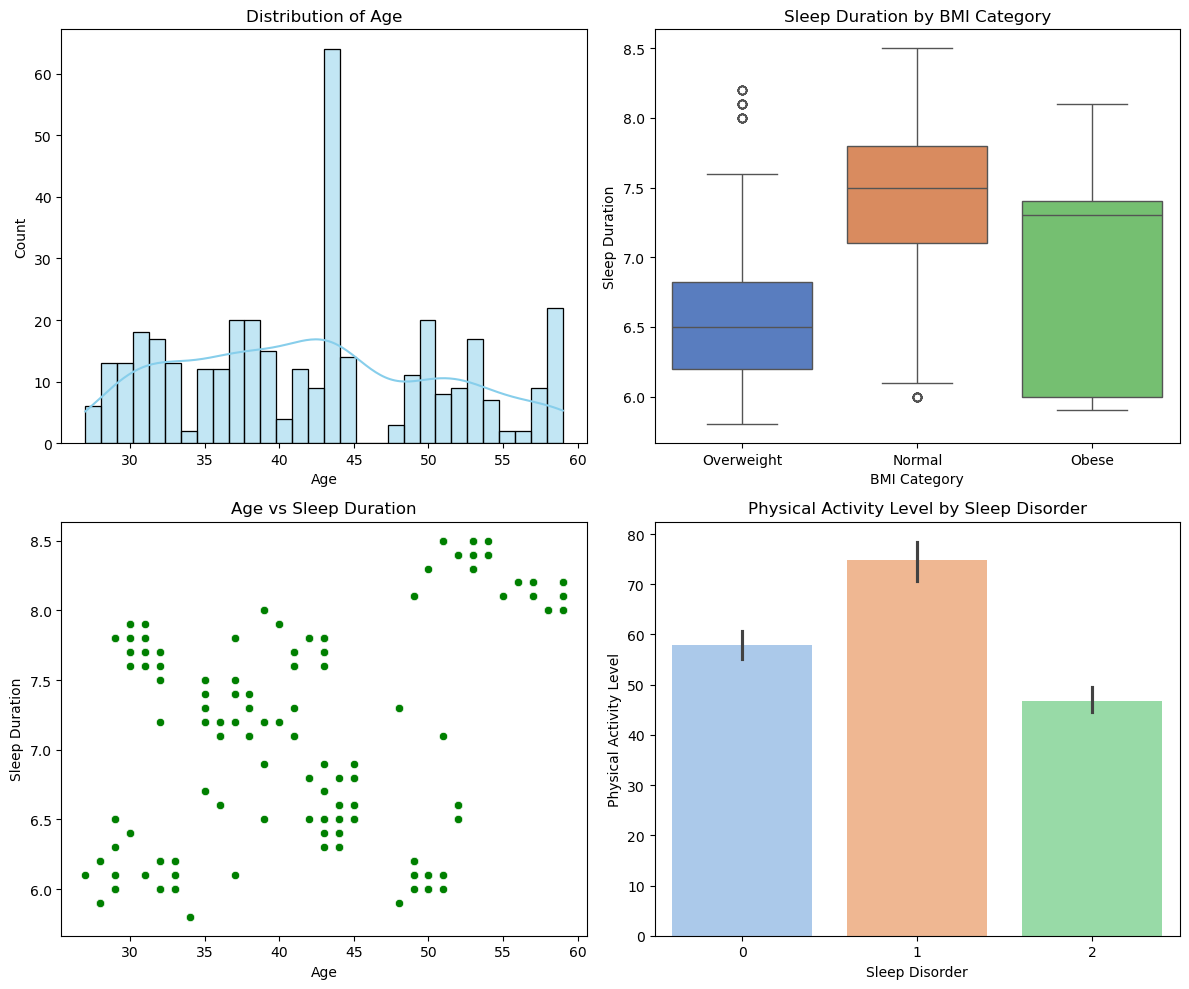

In [70]:
# Setting up the figure size
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid of subplots

# Plot 1: Histogram of Age
sns.histplot(data['Age'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Age')

# Plot 2: Boxplot of Sleep Duration by BMI Category
sns.boxplot(x='BMI Category', y='Sleep Duration', data=data, ax=axes[0, 1], palette='muted')
axes[0, 1].set_title('Sleep Duration by BMI Category')

# Plot 3: Scatter Plot of Age vs Sleep Duration
sns.scatterplot(x='Age', y='Sleep Duration', data=data, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Age vs Sleep Duration')

# Plot 4: Boxplot of Physical Activity Level by Sleep Disorder
sns.barplot(x='Sleep Disorder', y='Physical Activity Level', data=data, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Physical Activity Level by Sleep Disorder')

# Adjust layout
plt.tight_layout()
plt.show()

In [43]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1


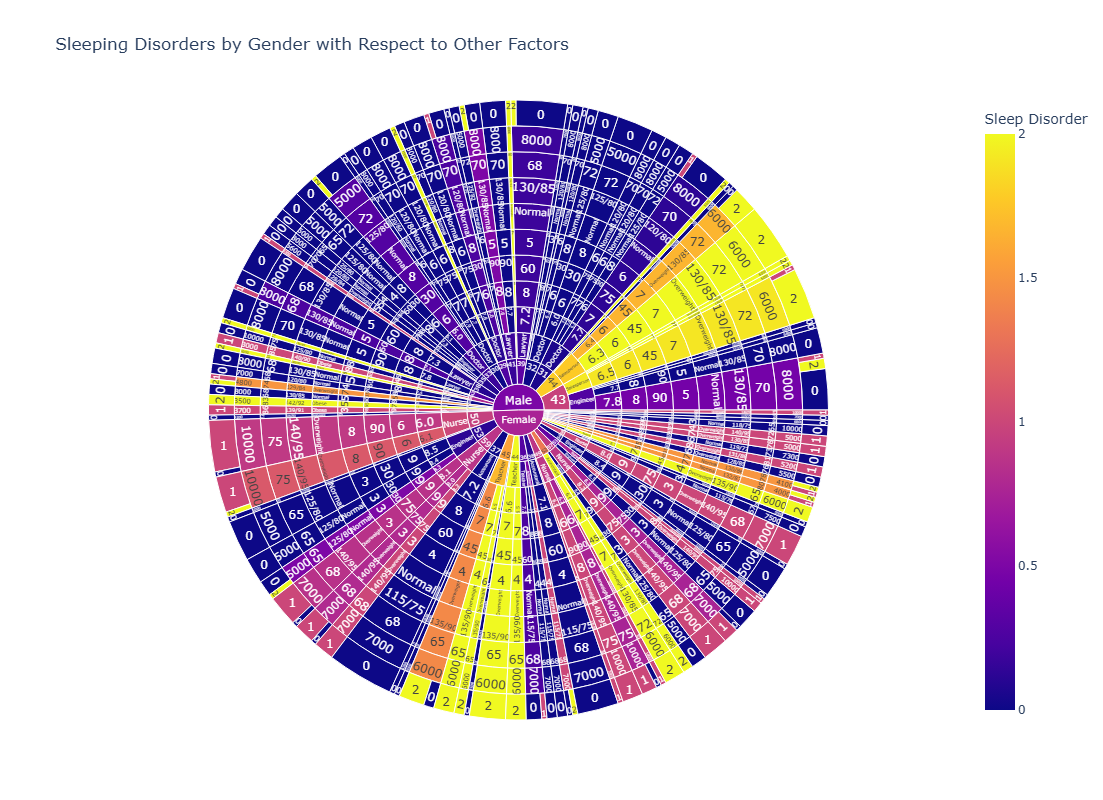

In [44]:

sleep_df = pd.DataFrame(data, columns=['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
                                       'Physical Activity Level', 'Stress Level', 'BMI Category',
                                       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'])

# Sunburst Chart
fig = px.sunburst(sleep_df,
                  path=['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
                        'Physical Activity Level', 'Stress Level', 'BMI Category', 
                        'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
                  color="Sleep Disorder",  # Color by sleep disorder category
                  title="Sleeping Disorders by Gender with Respect to Other Factors",
                  width=1200,  # Increased width
                  height=800)  # Increased height
fig.show()


#### Health Sector
#### NGOs
#### Gyms/ physical fitness companies
#### Government sector
#### Corporate wellness programs
#### Insurance
#### Education sector (Impact of Sleeping disorders on Students, and their impacts on their marks)